# 4. Statistical Packages in Python: Statsmodels

## 4.1. Introduction to Statsmodels

Statsmodels is a powerful Python package for statistical modeling and econometrics. It provides a wide range of tools and functions for conducting statistical analysis, including:

- Regression models (linear regression, generalized linear models, robust regression, etc.)
- Analysis of variance (ANOVA) 
- Time series analysis
- Nonparametric methods
- Survival analysis
- Multivariate statistics
- And more

Statsmodels is built on top of NumPy and SciPy, and integrates well with Pandas for data manipulation. It follows a consistent API for model specification, fitting, and post-estimation diagnostics.

Let's dive in and explore some key features and examples of using Statsmodels.

## 4.2. Installing Statsmodels

To get started, make sure you have Statsmodels installed. You can install it using pip:



In [13]:
!pip install statsmodels

Once installed, you can import the main Statsmodels API as follows:

In [14]:
import statsmodels.api as sm

## 4.3. Descriptive Statistics

Statsmodels provides functions for calculating various descriptive statistics. Let's generate some sample data and compute basic statistics:

In [106]:
import numpy as np
import wooldridge as woo
ceosal1 = woo.dataWoo('ceosal1')
from statsmodels.stats.descriptivestats import describe

# Generate sample data
#data = np.random.normal(loc=10, scale=2, size=100)
# Descriptive statistics
print(describe(ceosal1))

                           0
nobs              100.000000
missing             0.000000
mean               10.055860
std_err             0.209198
upper_ci           10.465881
lower_ci            9.645839
std                 2.091981
iqr                 3.039168
iqr_normal          2.252939
mad                 1.672667
mad_normal          2.096378
coef_var            0.208036
range               9.764228
max                14.501352
min                 4.737124
skew               -0.259885
kurtosis            2.651128
jarque_bera         1.632805
jarque_bera_pval    0.442019
mode                4.737124
mode_freq           0.010000
median             10.169867
1%                  5.110081
5%                  6.577809
10%                 7.367432
25%                 8.783056
50%                10.169867
75%                11.822224
90%                12.906518
95%                13.206578
99%                13.974487


## 4.4. Ordinary Least Squares (Linear Regression)

One of the most common statistical tasks is linear regression. Statsmodels makes it easy to fit and interpret linear regression models. 

First, let's create artificial X and y.

In [74]:
# Generate sample data
np.random.seed(123)
X = sm.add_constant(np.random.normal(size=100))
y = 10 + 2*X[:,1] + np.random.normal(size=100)
print(X)
print(y)

[[ 1.         -1.0856306 ]
 [ 1.          0.99734545]
 [ 1.          0.2829785 ]
 [ 1.         -1.50629471]
 [ 1.         -0.57860025]
 [ 1.          1.65143654]
 [ 1.         -2.42667924]
 [ 1.         -0.42891263]
 [ 1.          1.26593626]
 [ 1.         -0.8667404 ]
 [ 1.         -0.67888615]
 [ 1.         -0.09470897]
 [ 1.          1.49138963]
 [ 1.         -0.638902  ]
 [ 1.         -0.44398196]
 [ 1.         -0.43435128]
 [ 1.          2.20593008]
 [ 1.          2.18678609]
 [ 1.          1.0040539 ]
 [ 1.          0.3861864 ]
 [ 1.          0.73736858]
 [ 1.          1.49073203]
 [ 1.         -0.93583387]
 [ 1.          1.17582904]
 [ 1.         -1.25388067]
 [ 1.         -0.6377515 ]
 [ 1.          0.9071052 ]
 [ 1.         -1.4286807 ]
 [ 1.         -0.14006872]
 [ 1.         -0.8617549 ]
 [ 1.         -0.25561937]
 [ 1.         -2.79858911]
 [ 1.         -1.7715331 ]
 [ 1.         -0.69987723]
 [ 1.          0.92746243]
 [ 1.         -0.17363568]
 [ 1.          0.00284592]
 

There are two different ways of calling `sm.OLS`:
 - Providing a vector of responses and a matrix of regressors
 - Providing a formula and a data-frame 
 
Following, an example of the first style. 

In [77]:
# Fit linear regression model
model = sm.OLS(y, X)
results = model.fit()

`results` contains all the regression-related output. Following syntax is possible:

In [79]:
print(results.params)
print("=====================")
print(results.rsquared)

[9.98091425 1.98340745]
0.8418598186216624


The `summary` contains most regression-related relevant information in a neat way.

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     521.7
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.95e-41
Time:                        14:20:48   Log-Likelihood:                -138.83
No. Observations:                 100   AIC:                             281.7
Df Residuals:                      98   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9809      0.098    101.846      0.0

To learn more about a command, not only in `statsmodels` but in other packages as well, you can use the following syntax.

In [ ]:
print(sm.OLS.__doc__)


Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
data : DataFrame
index : str or object or a list of str, optional
    Column to use to make new frame's index. If None, uses
    existing index.

    .. versionchanged:: 1.1.0
       Also accept list of index names.

columns : str or object or a list of str
    Column to use to make new frame's columns.

    .. versionchanged:: 1.1.0
       Also accept list of columns names.

values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    specified, all remaining columns will be used and the result will
    have h

### 4.4.1. Using R-style formulas

In [17]:
!pip install wooldridge

Now let's use a preexisting dataset. We will load the package `wooldridge`, which contains datasets from Wooldridge's famous book on Econometrics. The following dataset contains information on CEO's salaries. Let's have a glimpse on the data.

In [26]:
ceosal1.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


How are CEO's salaries related to firm's return on equity?

In [83]:
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Tue, 23 Apr 2024   Prob (F-statistic):             0.0978
Time:                        14:30:25   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



Text(0.5, 0, 'roe')

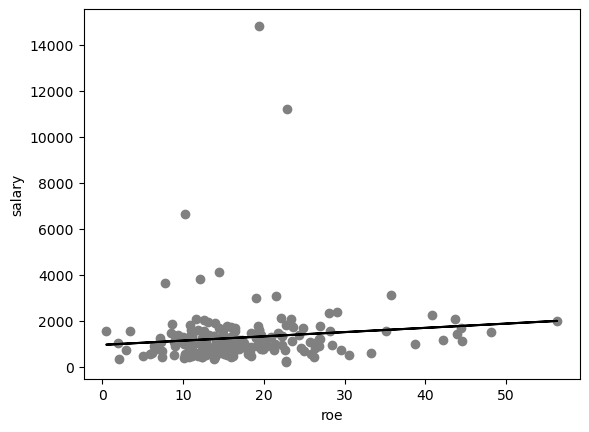

In [84]:
print(f'b: \n{b}\n')
plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')

Let's look at a summary of our results.

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Tue, 23 Apr 2024   Prob (F-statistic):             0.0978
Time:                        11:54:36   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model summary provides key information such as the R-squared value, coefficients, standard errors, t-statistics, and p-values.


## IN-CLASS:

1. Use Wooldridge's `wage1` dataset. This dataset contains wage information (in dollars per hour) for a group of workers, as well as some of their characteristics.

2. Run a OLS regression of `wage` vs. `educ` (years of education). How much does wage increase for one extra year of education? Use `summary()` to help you here and in the next questions.

3. Is the coefficient significant at 5%?

4. Now let's see how does log(`wage`) vary with `educ`. To do so, call function `np.log()` on `wage` inside the formula.

5. Let's add regressors to our formula. First, add `exper` and `tenure`. Second, consider interactions: add `exper*tenure` to your formula. How do the results vary?

6. Add `-1` to the formula to remove the intercept in a regression of `wage` vs. `educ`. Do the coefficients vary? Do you think it makes sense to remove the intercept in this specification?

In [22]:
import numpy as np
import wooldridge as woo
import statsmodels.formula.api as smf
wage1 = woo.dataWoo('wage1')
# estimate log-level model:
reg = smf.ols(formula='np.log(wage) ~ educ', data=wage1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')
results.summary()

b: 
Intercept    0.583773
educ         0.082744
dtype: float64



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           3.27e-25
Time:                        11:54:52   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now suppose that we want to include `numdep` in our analysis. A quick look at the dataframe shows us that `numdep` likely assumes a limited set of values. Let's confirm this:

In [92]:
wage1.numdep.unique()

array([2, 3, 0, 1, 5, 4, 6])

How to explicitly state that a variable is categorical?

In [93]:
import numpy as np
import wooldridge as woo
import statsmodels.formula.api as smf
wage1 = woo.dataWoo('wage1')
# estimate log-level model:
reg = smf.ols(formula='np.log(wage) ~ educ + C(numdep)', data=wage1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')
results.summary()

b: 
Intercept         0.591455
C(numdep)[T.1]   -0.042112
C(numdep)[T.2]   -0.050374
C(numdep)[T.3]    0.127399
C(numdep)[T.4]   -0.143462
C(numdep)[T.5]   -0.120801
C(numdep)[T.6]    0.277017
educ              0.083081
dtype: float64



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     18.17
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.20e-21
Time:                        14:34:57   Log-Likelihood:                -355.70
No. Observations:                 526   AIC:                             727.4
Df Residuals:                     518   BIC:                             761.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5915      0.106      5.579      0.000       0.383       0.800
C(numdep)[T.1]    -0.0421      0.056     -0.756      0.450      -0.152       0.067
C(numdep)[T.2]    -0.0504      0.057     -0.885      0.376      -0.162       0.061
C(numdep)[T.3]     0.1274      0.078      1.631      0.103      -0.026       0.281
C(numdep)[T.4]    -0.1435      0.124     -1.156      0.248      -0.387       0.100
C(numdep)[T.5]    -0.1208      0.189     -0.638      0.523      -0.493       0.251
C(numdep)[T.6]     0.2770      0.343      0.808      0.420      -0.397       0.951
educ               0.0831      0.008     10.527      0.000       0.068       0.099
==============================================================================
Omnibus:                       13.606   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.496
Skew:                           0.286   Prob(JB):                     0.000262
Kurtosis:                       3.652   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`statsmodels` can also run GLS, WLS, etc.

## 4.5. Diagnostic plots in Python

Diagnostic plots in Python helps us determine visually how our model is fitting the data and if any of the assumptions of OLS are being violated.

- Residual plot: are the patterns in the residual distribution? Ideally, you want your residuals to look like white noise. Patterns may hint that a better specification is needed (e.g. adding nonlinear terms or adjusting for heteroskedasticity)

- QQ plot: assesses if residuals follow a normal distribution. If this isn't the case, you may need to adjust the functional form of your regressions.

- The residuals vs leverage plot shows influential data points. Leverage measures the influence a single data point has on the regression equation, particularly on the estimated regression coefficients. I.e. if we removed high-leverage points, the regression coefficients would change significantly. You may want to check if influential observations are not errors.

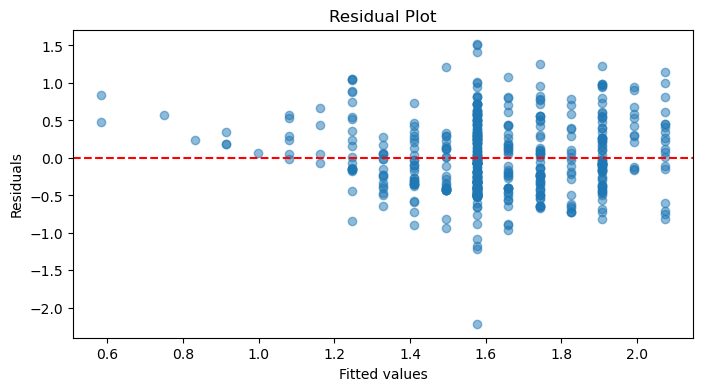

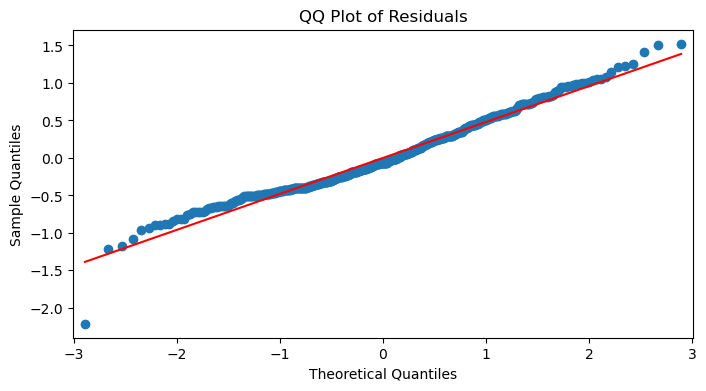

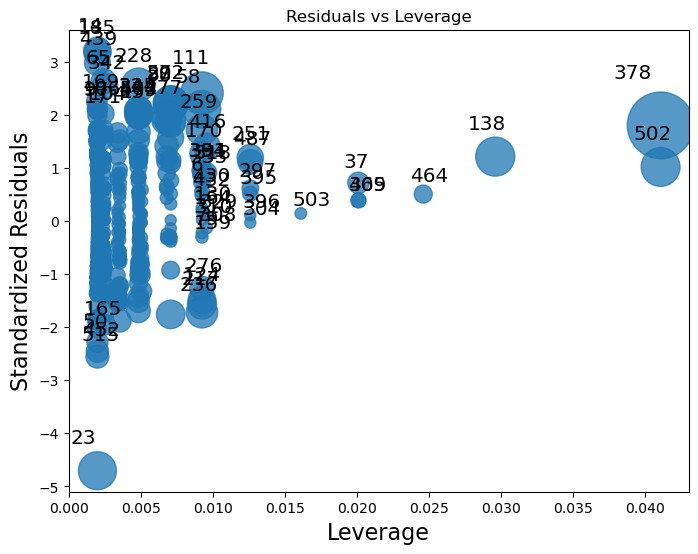

In [61]:
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
import numpy as np

# Load data
wage1 = woo.dataWoo('wage1')

# Fit the linear regression model
reg = smf.ols(formula='np.log(wage) ~ educ', data=wage1)
results = reg.fit()

# 1) Residual Plot
residuals = results.resid
fitted = results.fittedvalues
plt.figure(figsize=(8, 4))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 2) QQ Plot
fig, ax = plt.subplots(figsize=(8, 4))
sm_api.qqplot(residuals, line='s', ax=ax)  # 's' for standardized line
plt.title('QQ Plot of Residuals')
plt.show()

# 3) Residuals vs Leverage Plot
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(results, ax=ax, criterion="cooks")
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')
# Annotations are automatically included to highlight points with high leverage or high Cook's distances
plt.show()


## IN-CLASS:
Do the same analysis above for the `salary ~ roe` analysis we did in the beginning.


## 4.6. Quantile regression

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Tue, 23 Apr 2024   No. Observations:                  235
Time:                        13:34:55   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


Text(0, 0.5, 'Food expenditure')

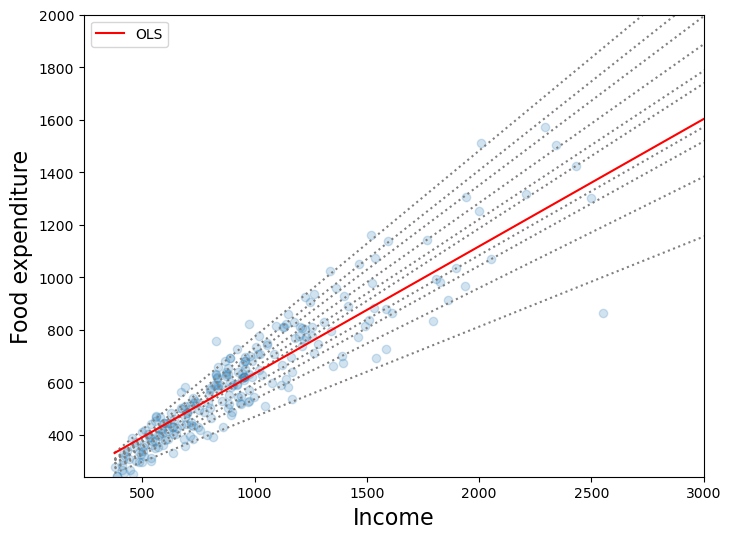

In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = sm.datasets.engel.load_pandas().data
data.head()

mod = smf.quantreg("foodexp ~ income", data)
res = mod.fit(q=0.5)
print(res.summary())

quantiles = np.arange(0.05, 0.96, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["income"]] + res.conf_int().loc[
        "income"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols("foodexp ~ income", data).fit()
ols_ci = ols.conf_int().loc["income"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["income"], lb=ols_ci[0], ub=ols_ci[1]
)

x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle="dotted", color="grey")

y = get_y(ols["a"], ols["b"])

ax.plot(x, y, color="red", label="OLS")
ax.scatter(data.income, data.foodexp, alpha=0.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel("Income", fontsize=16)
ax.set_ylabel("Food expenditure", fontsize=16)


## 4.7. Logit and probit

Specialized models for binary responses make sure that the implied probabilities are restricted between 0 and 1 . An important class of models specifies the success probability as
$$
\mathrm{P}(y=1 \mid \mathbf{x})=G\left(\beta_0+\beta_1 x_1+\cdots+\beta_k x_k\right)=G(\mathbf{x} \boldsymbol{\beta})
$$
where the "link function" $G(z)$ always returns values between 0 and 1 . In the statistics literature, this type of models is often called generalized linear model (GLM) because a linear part $\mathbf{x} \beta$ shows up within the nonlinear function $G$.
For binary response models, by far the most widely used specifications for $G$ are
- the probit model with $G(z)=\Phi(z)$, the standard normal CDF and
- the logit model with $G(z)=\Lambda(z)=\frac{\exp (z)}{1+\exp (z)}$, the CDF of the logistic distribution.

In [59]:
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)
logit_res = logit_mod.fit(disp=0)
print("Parameters: ", logit_res.params)

Parameters:  GPA       2.826113
TUCE      0.095158
PSI       2.378688
const   -13.021347
dtype: float64


## IN-CLASS:
- Use Wooldridge's `mroz` dataframe. This dataframe comes from the paper: “The Sensitivity of an Empirical Model of Married Women’s Hours of Work to Economic and Statistical Assumptions”, by T.A. Mroz (1987).

- Knowing the meaning of the following variables:

inlf: =1 if in lab frce, 1975

nwifeinc: (faminc - wage*hours)/1000

educ: years of schooling

exper: actual labor mkt exper

age: woman's age in yrs

kidslt6: # kids < 6 years

kidsge6: # kids 6-18

- Use a logit model to understand how the log-odds of being in the labor force in 1975 vary with the other variables.

In [107]:
mroz = woo.dataWoo('mroz')
# estimate logit model:
reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper +'
                              'I(exper**2) + age + kidslt6 + kidsge6',
                      data=mroz)
# disp = 0 avoids printing out information during the estimation:
results_logit = reg_logit.fit(disp=0)
print(f'results_logit.summary(): \n{results_logit.summary()}\n')

results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                  0.2197
Time:                        15:40:32   Log-Likelihood:                -401.77
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 3.159e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4255      0.860      0.494      0.621      -1.261       2.112
nwifeinc         -0.0213      0.008     -2.535      0.011      -0.038      -0.005
educ          

## 4.8. Rolling window regression

Rolling OLS applies OLS across a fixed windows of observations and then rolls (moves or slides) the window across the data set. They key parameter is window which determines the number of observations used in each OLS regression. By default, RollingOLS drops missing values in the window and so will estimate the model using the available data points.

Estimated values are aligned so that models estimated using data points $i+1, i+2, ..., i+window$ are stored in location $i+window$.

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()

Date
1926-07     2.68
1926-08     2.41
1926-09    -0.61
1926-10    -4.90
1926-11     4.40
           ...  
2023-10    -2.25
2023-11    11.52
2023-12     4.27
2024-01     2.57
2024-02     5.73
Freq: M, Name: HiTec, Length: 1172, dtype: float64

pandas-datareader is used to download data from Ken French’s website. The two data sets downloaded are the 3 Fama-French factors and the 10 industry portfolios. Data is available from 1926.

The data are monthly returns for the factors or industry portfolios.

In [100]:
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="1-1-1926")[0]
factors.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


In [101]:
industries = pdr.get_data_famafrench("10_Industry_Portfolios", start="1-1-1926")[0]
industries.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


The model estimated is a rolling version of the CAPM that regresses the excess return of Technology sector firms on the excess return of the market.

The window is 60 months, and so results are available after the first 60 (window) months. The first 59 (window - 1) estimates are all nan filled.

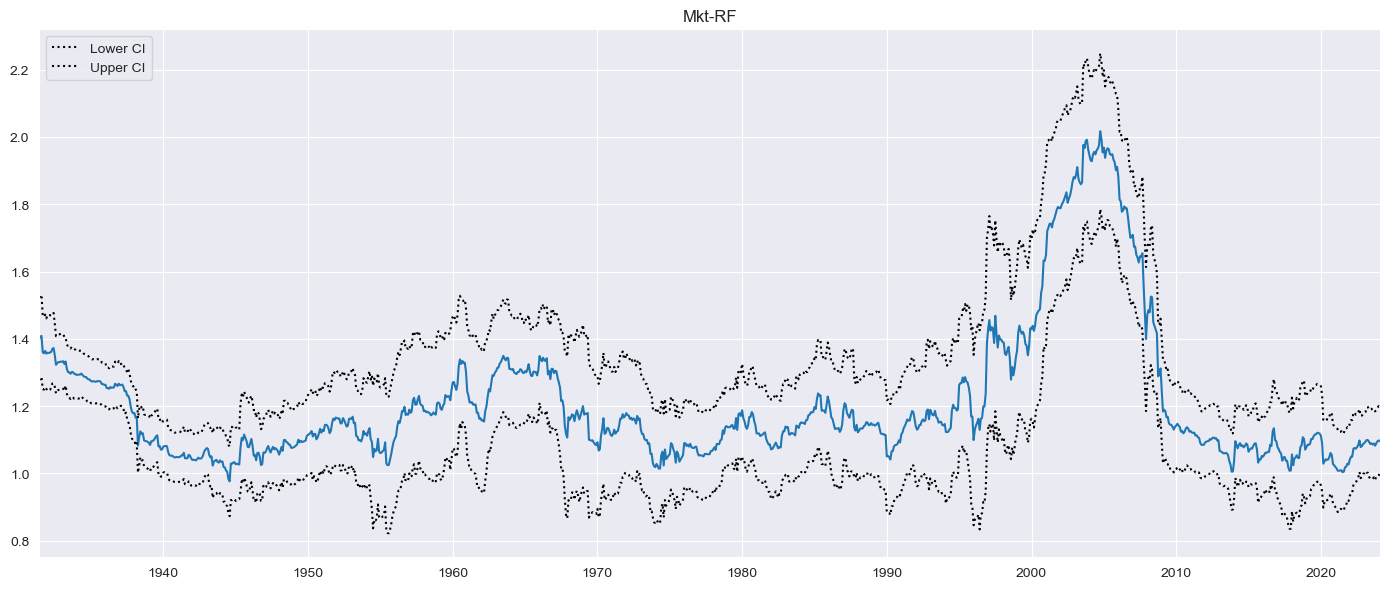

In [102]:

endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors["Mkt-RF"])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.head()
fig = rres.plot_recursive_coefficient(variables=["Mkt-RF"], figsize=(14, 6))

## 4.9. Panel data (`linearmodels`)

A panel data set includes several observations at different points in time t for the same (or at least an overlapping) set of cross-sectional units i. In the example below, both effects are used: $y_{i t}=\alpha_i+\gamma_t+\beta^{\prime} x_{i t}+\epsilon_{i t}$

In [ ]:
from linearmodels import PanelOLS
from linearmodels.panel import generate_panel_data
panel_data = generate_panel_data()
panel_data.data

y        x0        x1        x2        x3        x4
major   minor                                                                 
firm0   1900-12-31 -1.214290  0.160245 -0.579242  0.571671 -0.822557 -2.576228
        1901-12-31  2.998010 -2.172773 -1.795467  0.991483  0.900464  0.243234
        1902-12-31 -0.483675  0.744538 -1.525777  0.984175  1.427581 -2.027181
        1903-12-31  1.662189 -1.515617 -0.757041  0.720989 -0.161802  0.366803
        1904-12-31 -0.170545 -1.380720 -1.738797 -0.263379  0.363579 -1.003499
...                      ...       ...       ...       ...       ...       ...
firm970 1902-12-31  0.163697 -1.003405 -0.216683 -0.035853  1.694873  0.417985
        1903-12-31 -0.576166  1.789087  1.949266 -0.774195 -0.914369  1.569845
        1904-12-31 -0.876078  0.576802 -0.878326 -0.175044  1.135372  1.033827
        1905-12-31 -2.416914 -0.012307  1.237810  0.031346 -0.028605  0.007808
        1906-12-31 -1.750980  0.441772  0.580217  0.504310 -0.337466 -0.179957

[6797 rows x 6 columns]

PanelOLS allows for easy clustering of standard errors.

In [ ]:
mod = PanelOLS.from_formula("y ~ 1 + x1 + EntityEffects + TimeEffects", panel_data.data)
res = mod.fit(cov_type="clustered", cluster_entity=True)